# 时间序列


## 考研人数分析


1994~2020年 报名人数以及录取人数


2020年的人数用的是预测，因为2021年6月才会公布2020年的录取人数

# 程序执行


## 加载数据


xls表postgrad.xlsx




In [1]:
import pandas as pd
df = pd.read_excel('./postgrad.xlsx', index_col='年份')
df

,报名人数（万人）,录取人数（万人）
年份,,
1994年,11.40,4.20
1995年,15.50,4.00
1996年,20.40,4.70
1997年,24.20,5.10
1998年,27.40,5.80
1999年,31.90,7.20
2000年,39.20,10.30
2001年,46.00,13.30
2002年,62.40,16.40


## 时间序列图表



In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
df.plot()

<AxesSubplot:xlabel='年份'>

# 自相关


绘制自相关图，判断序列是否自相关


自相关函数（Autocorrelation Function）

In [3]:
from statsmodels.tsa import stattools
stattools.acf(df['报名人数（万人）'])

array([ 1.        ,  0.81423905,  0.65027144,  0.52544157,  0.4328871 ,
        0.36415266,  0.3069205 ,  0.23352341,  0.14151236,  0.05541858,
       -0.01477011, -0.07164203, -0.09999569, -0.12142532, -0.16265738,
       -0.22333888, -0.28665141, -0.32811461, -0.35836546, -0.36852085,
       -0.35864085, -0.34768165, -0.33612065, -0.31564578, -0.28059369,
       -0.2219345 , -0.12826781])

数据可能看着不直观，我们画个图



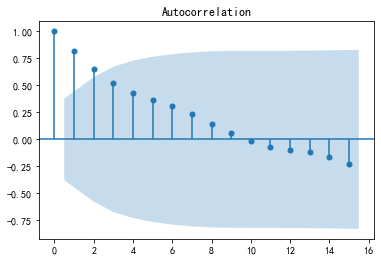

In [4]:
from statsmodels.graphics import tsaplots
tsaplots.plot_acf(df['报名人数（万人）'])
pass

由自相关图可以看出，在3阶后落区间内，衰减缓慢，应该属于平稳，有趋势


# 偏自相关

array([ 1.        ,  0.84555593, -0.04445655,  0.0298257 ,  0.03462791,
        0.034026  ,  0.00759744, -0.11156674, -0.16717121, -0.11336622,
       -0.09277878, -0.10712055,  0.00642539])

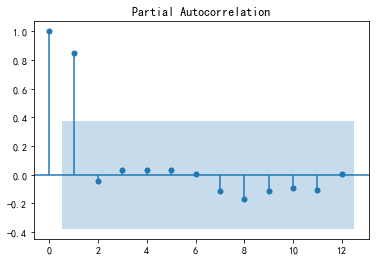

In [5]:
tsaplots.plot_pacf(df['报名人数（万人）'], lags=12)
stattools.pacf(df['报名人数（万人）'], nlags=12)

# 另一个数据也做一下acf和pacf

array([ 1.        ,  0.90635168,  0.78035313,  0.65847944,  0.5598513 ,
        0.45598476,  0.34901671,  0.2403352 ,  0.1347219 ,  0.02950099,
       -0.06715947, -0.15019099, -0.2153658 , -0.27419281, -0.33135291,
       -0.38162206, -0.41213264, -0.42565124, -0.42330957, -0.40921656,
       -0.38208566, -0.34535829, -0.30072176, -0.24994437, -0.16890641,
       -0.07738458])

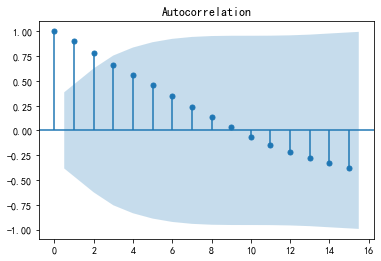

In [6]:
tsaplots.plot_acf(df['录取人数（万人）'].dropna())
stattools.acf(df['录取人数（万人）'].dropna())

录取人数跟报名人数类似，平稳有趋势

array([ 1.        ,  0.94260575, -0.38677324,  0.04087103,  0.11054174,
       -0.33657641, -0.04722021, -0.1337929 , -0.24374934, -0.21828769,
       -0.15339166, -0.19864778, -0.17468422])

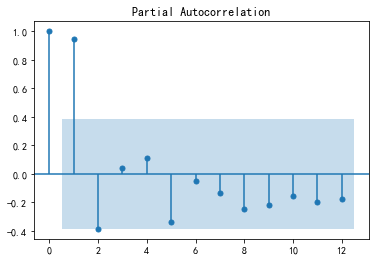

In [7]:
tsaplots.plot_pacf(df['录取人数（万人）'].dropna(), lags=12)
stattools.pacf(df['录取人数（万人）'].dropna(), nlags=12)

# 单位根检验（Dickey-Fuller test）


p-value较高，序列具有单位根，即非平稳。

In [8]:
def dickey(df):
    t = stattools.adfuller(df)
    output = pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
    output['value']['Test Statistic Value'] = t[0]
    output['value']['p-value'] = t[1]
    output['value']['Lags Used'] = t[2]
    output['value']['Number of Observations Used'] = t[3]
    output['value']['Critical Value(1%)'] = t[4]['1%']
    output['value']['Critical Value(5%)'] = t[4]['5%']
    output['value']['Critical Value(10%)'] = t[4]['10%']
    return output

In [9]:
dickey(df['报名人数（万人）'])

,value
Test Statistic Value,1.332336
p-value,0.996784
Lags Used,2
Number of Observations Used,24
Critical Value(1%),-3.737709
Critical Value(5%),-2.992216
Critical Value(10%),-2.635747


分析一下该序列能否平稳：


1%、%5、%10不同程度拒绝原假设的统计值和ADF Test result的比较，ADF Test result同时小于1%、5%、10%即说明非常好地拒绝该假设，本数据中，adf结果（Test Statistic）为1.332336， 大于三个level的统计值(-3.737709, -2.992216, -2.635747)。


看P-value是否非常接近0. 本数据中，P-value 为 0.996784,不够接近0。


ADF检验的原假设是存在单位根，只要这个统计值是小于1%水平下的数字就可以极显著的拒绝原假设，认为数据平稳。注意，ADF值一般是负的，也有正的，但是它只有小于1%水平下的才能认为是及其显著的拒绝原假设。


对于ADF结果在1% 以上 5%以下的结果，也不能说不平稳，关键看检验要求是什么样子的。


但是对于本例，数据是显然不平稳的了。

In [10]:
dickey(df['录取人数（万人）'].dropna())

,value
Test Statistic Value,-0.175254
p-value,0.941408
Lags Used,9
Number of Observations Used,16
Critical Value(1%),-3.924019
Critical Value(5%),-3.068498
Critical Value(10%),-2.673893


报名人数也不平稳


# 一阶差分

,value
Test Statistic Value,-1.731451
p-value,0.414985
Lags Used,1
Number of Observations Used,24
Critical Value(1%),-3.737709
Critical Value(5%),-2.992216
Critical Value(10%),-2.635747


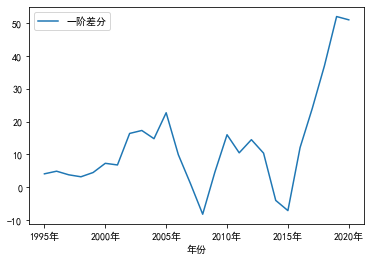

In [11]:
signdiff = pd.DataFrame()
signdiff['一阶差分'] = df['报名人数（万人）'].diff().dropna()
signdiff.plot()
dickey(signdiff['一阶差分'])

做了一阶差分依然不够平稳，稍后需要做二阶差分


原因应该是近几年报名人数急剧增加，跟之前的进度完全不一样


## 录取人数做一阶差分

,value
Test Statistic Value,-3.094678
p-value,0.02695
Lags Used,9
Number of Observations Used,15
Critical Value(1%),-3.964443
Critical Value(5%),-3.084908
Critical Value(10%),-2.681814


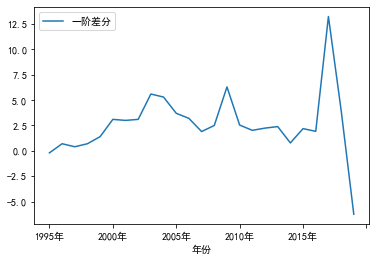

In [12]:
enrolldiff = pd.DataFrame()
enrolldiff['一阶差分'] = df['录取人数（万人）'].diff().dropna()
enrolldiff.plot()
dickey(enrolldiff)

录取人数一阶差分之后p-value小于0.05了，达到显著水平


# 多阶差分

,value
Test Statistic Value,-0.33767
p-value,0.919997
Lags Used,4
Number of Observations Used,20
Critical Value(1%),-3.809209
Critical Value(5%),-3.021645
Critical Value(10%),-2.650713


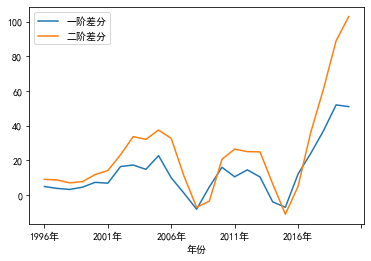

In [13]:
signdiff['二阶差分'] = df['报名人数（万人）'].diff(periods=2)
signdiff = signdiff.dropna()
signdiff.plot()
dickey(signdiff['二阶差分'])

二阶差分还是不行，做三阶差分




,value
Test Statistic Value,-3.642791
p-value,0.004994
Lags Used,1
Number of Observations Used,22
Critical Value(1%),-3.769733
Critical Value(5%),-3.005426
Critical Value(10%),-2.642501


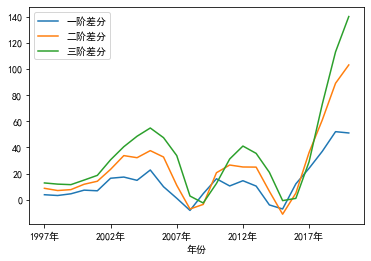

In [14]:
signdiff['三阶差分'] = df['报名人数（万人）'].diff(periods=3)
signdiff = signdiff.dropna()
signdiff.plot()
dickey(signdiff['三阶差分'])

终于平稳了


但是差分太多，可能数据没有意义了，预测准确度虽然低，可能还是要用原始的数据

# 获取一下最佳p和q


我们在p=0、1、2、3、4和q=0、1、2中做对比


这时候画一个热力图效果很好

In [15]:
import numpy as np
from statsmodels.tsa import arima_model
import itertools
import seaborn as sns #热力图
import warnings
warnings.filterwarnings("ignore")
def thermodynamicOrder(df, ar=4, ma=2):
    results_aic = pd.DataFrame(\
        index=['AR{}'.format(i) for i in range(0, ar+1)],\
        columns=['MA{}'.format(i) for i in range(0, ma+1)])
    for p, q in itertools.product(range(0, ar+1), range(0, ma+1)):
        if p==0 and q==0:
            results_aic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
            continue
        try:
            results = arima_model.ARMA(df, (p, q)).fit()
            #返回不同pq下的model的BIC值
            results_aic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.aic
        except:
            continue
    results_aic = results_aic[results_aic.columns].astype(float)
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(results_aic,
                    #mask=results_aic.isnull(),
                    ax=ax,
                    annot=True, #将数字显示在热力图上
                    fmt='.2f',
                    )
    ax.set_title('AIC')
    plt.show()

## 报名人数热力图


使用原始数据

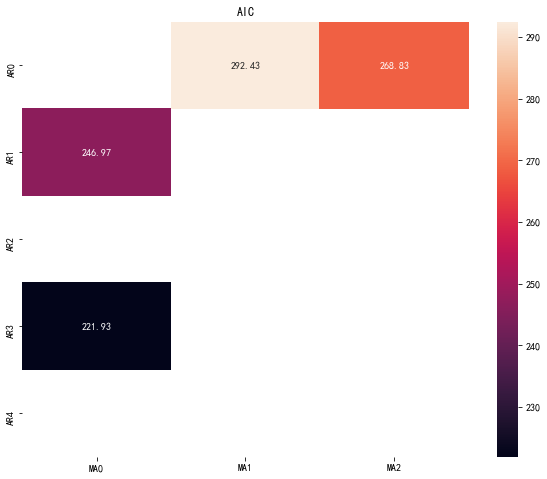

In [16]:
thermodynamicOrder(df['报名人数（万人）'], 4, 2)

可以得到p=3，q=0 效果最好


## 录取人数热力图

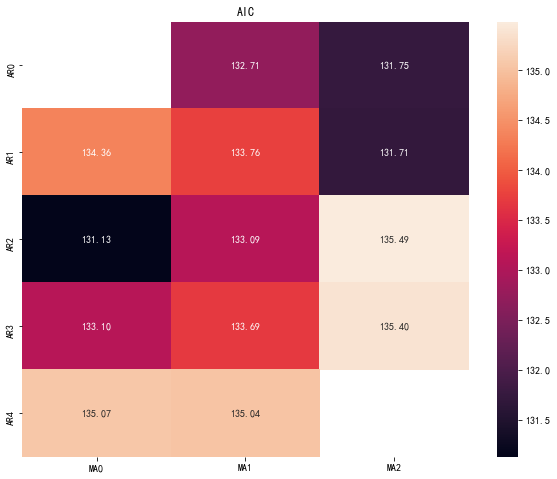

In [17]:
thermodynamicOrder(enrolldiff['一阶差分'], 4, 2)

可以得到p=2，q=0效果最好

# 模型预测


## 还原差分函数

In [18]:
def revert(diffValues, *lastValue):
    for i in range(len(lastValue)):
        result = []
        lv = lastValue[i]
        for dv in diffValues:
            lv = dv + lv
            result.append(lv)
        diffValues = result
    return diffValues

## 报名预测

<AxesSubplot:xlabel='年份'>

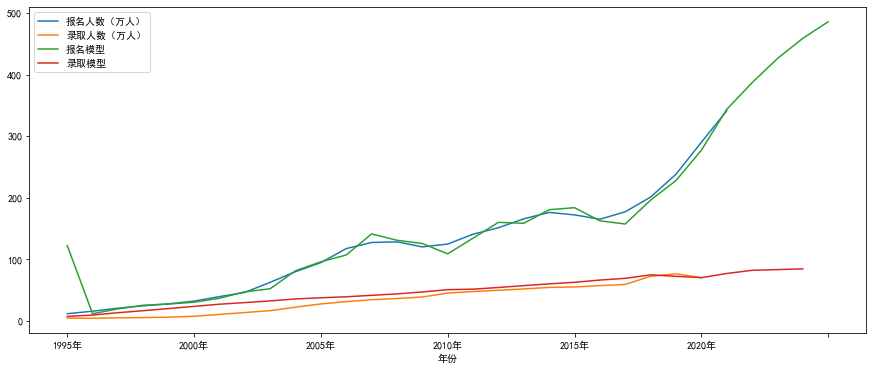

In [19]:
fig, ax = plt.subplots(figsize=(15, 6))
df.plot(ax=ax)
signarma = arima_model.ARMA(df['报名人数（万人）'], (3, 0)).fit()
signfuture = pd.DataFrame({'报名模型': signarma.fittedvalues}, index=signarma.fittedvalues.index)
signfuture = signfuture.append(pd.DataFrame({'报名模型': signarma.forecast(4)[0]}, index=['2021年','2022年','2023年','2024年']))
signfuture.plot(ax=ax)
enrollarma = arima_model.ARMA(enrolldiff['一阶差分'], (2, 0)).fit()
enrollfuture = pd.DataFrame({'录取模型': revert(enrollarma.fittedvalues, df['录取人数（万人）'][0])}, index=enrollarma.fittedvalues.index)
enrollfuture = enrollfuture.append(pd.DataFrame({'录取模型':revert(enrollarma.forecast(5)[0], df['录取人数（万人）'][-2])}, index=['2020年','2021年','2022年','2023年','2024年']))
enrollfuture.plot(ax=ax)